# Using ChatGPT to numerically solve differential equations

## Forward Euler

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Prompt: Please write me a forward Euler code that solves the following differential equation $dy(x)/dx = - y(x)$ with the initial condition $y(0) = 1$. I also want the plot of the numerical solution comparing it to the original analytical solution so can you please give me that as well?

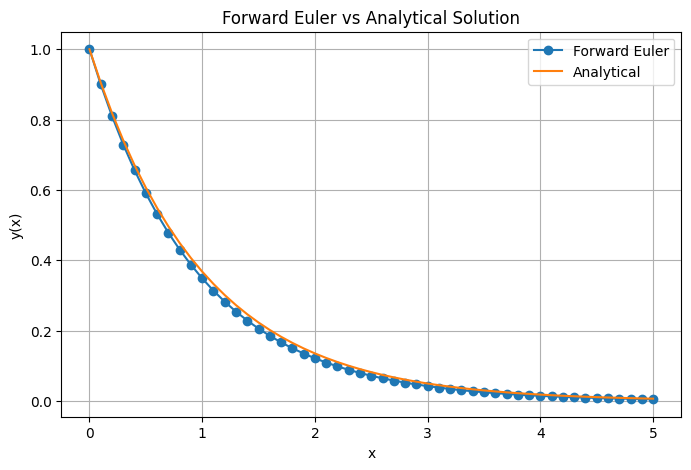

In [3]:
# Parameters
y0 = 1.0         # initial condition
x_max = 5.0      # maximum x value
dx = 0.1         # step size

# Initialize arrays
x = np.arange(0, x_max + dx, dx)
y_euler = np.zeros_like(x)
y_exact = np.zeros_like(x)

# Set initial condition
y_euler[0] = y0
y_exact[0] = y0

# Forward Euler method
for i in range(0, len(x)-1):
    y_euler[i+1] = y_euler[i] + dx * (-y_euler[i])  # dy/dx = -y

# Analytical solution
y_exact = y0 * np.exp(-x)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(x, y_euler, 'o-', label='Forward Euler')
plt.plot(x, y_exact, '-', label='Analytical')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Forward Euler vs Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()


## Predictor-corrector

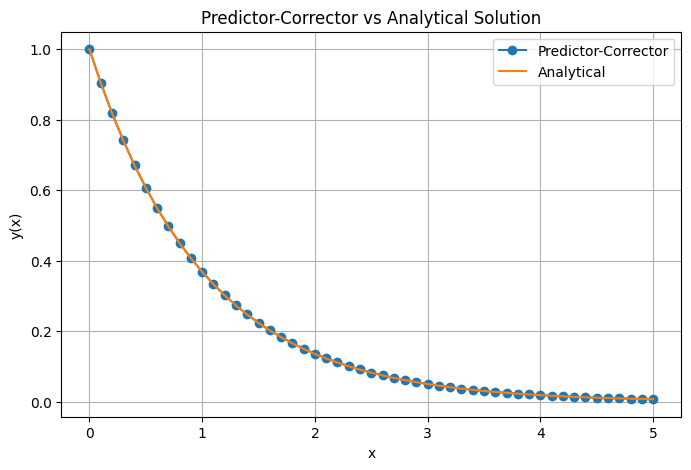

In [2]:
# Parameters
y0 = 1.0
x_max = 5.0
dx = 0.1

# Initialize arrays
x = np.arange(0, x_max + dx, dx)
y_pc = np.zeros_like(x)
y_exact = np.zeros_like(x)

# Initial condition
y_pc[0] = y0

# Predictor-Corrector (Heun's method)
for i in range(len(x)-1):
    # Predictor
    y_pred = y_pc[i] + dx * (-y_pc[i])
    # Corrector
    y_pc[i+1] = y_pc[i] + (dx/2) * (-y_pc[i] - y_pred)

# Analytical solution
y_exact = y0 * np.exp(-x)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(x, y_pc, 'o-', label='Predictor-Corrector')
plt.plot(x, y_exact, '-', label='Analytical')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Predictor-Corrector vs Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()


## Second order differential equations

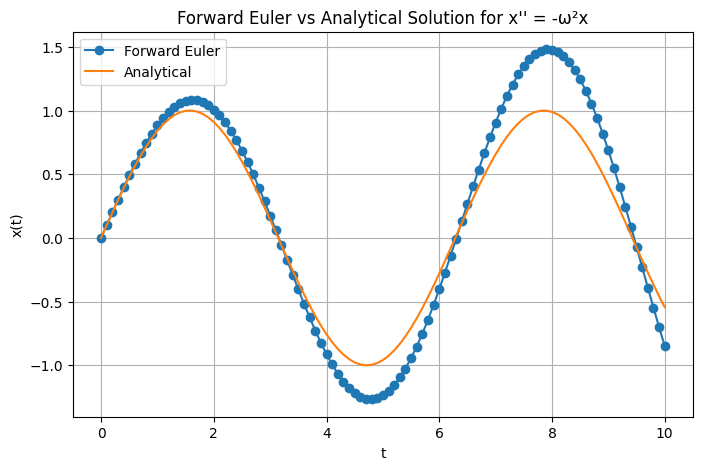

In [7]:
# Parameters
omega = 1.0
t_max = 10.0
dt = 0.1

# Initialize arrays
t = np.arange(0, t_max + dt, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)

# Initial conditions
x[0] = 0.0
v[0] = 1.0

# Forward Euler integration
for i in range(len(t)-1):
    x[i+1] = x[i] + dt * v[i]
    v[i+1] = v[i] + dt * (-omega**2 * x[i])

# Analytical solution
x_exact = (1/omega) * np.sin(omega * t)

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, x, 'o-', label='Forward Euler')
plt.plot(t, x_exact, '-', label='Analytical')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Forward Euler vs Analytical Solution for x\'\' = -ω²x')
plt.legend()
plt.grid(True)
plt.show()


## Predictor corrector for second order differential equation

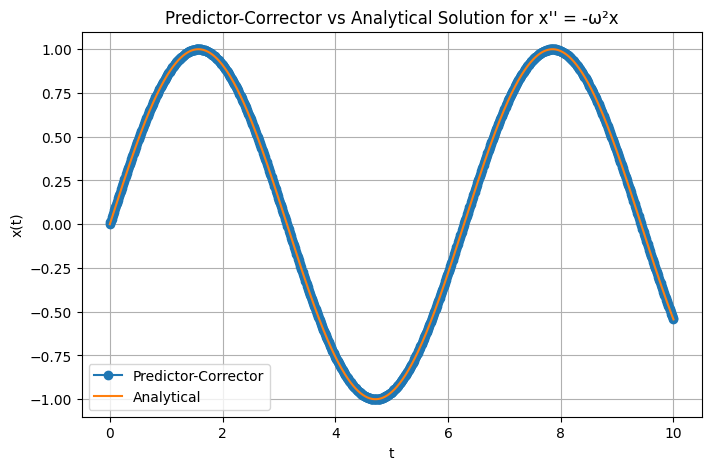

In [8]:
# Parameters
omega = 1.0
t_max = 10.0
dt = 0.01

# Initialize arrays
t = np.arange(0, t_max + dt, dt)
x_pc = np.zeros_like(t)
v_pc = np.zeros_like(t)

# Initial conditions
x_pc[0] = 0.0
v_pc[0] = 1.0

# Predictor-Corrector integration
for i in range(len(t)-1):
    # Predictor step
    x_pred = x_pc[i] + dt * v_pc[i]
    v_pred = v_pc[i] + dt * (-omega**2 * x_pc[i])
    
    # Corrector step
    x_pc[i+1] = x_pc[i] + (dt/2) * (v_pc[i] + v_pred)
    v_pc[i+1] = v_pc[i] + (dt/2) * ((-omega**2 * x_pc[i]) + (-omega**2 * x_pred))

# Analytical solution
x_exact = (1/omega) * np.sin(omega * t)

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, x_pc, 'o-', label='Predictor-Corrector')
plt.plot(t, x_exact, '-', label='Analytical')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Predictor-Corrector vs Analytical Solution for x\'\' = -ω²x')
plt.legend()
plt.grid(True)
plt.show()


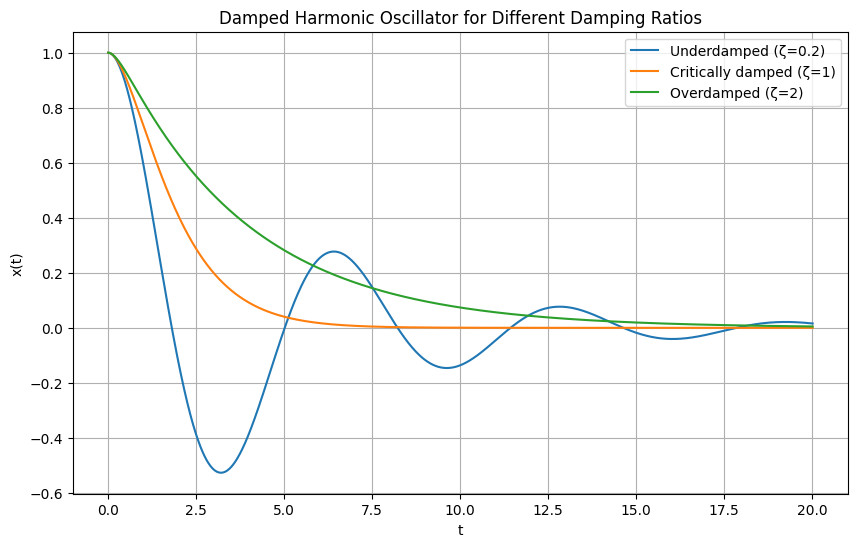

In [9]:
# Parameters
omega0 = 1.0
t_max = 20.0
dt = 0.01
t = np.arange(0, t_max + dt, dt)

# Initial conditions
x0 = 1.0
v0 = 0.0

# Damping cases
damping_cases = {
    "Underdamped (ζ=0.2)": 0.2,
    "Critically damped (ζ=1)": 1.0,
    "Overdamped (ζ=2)": 2.0
}

plt.figure(figsize=(10,6))

for label, zeta in damping_cases.items():
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0

    # Predictor-Corrector integration
    for i in range(len(t)-1):
        # Predictor
        x_pred = x[i] + dt * v[i]
        v_pred = v[i] + dt * (-2*zeta*omega0*v[i] - omega0**2 * x[i])
        
        # Corrector
        x[i+1] = x[i] + (dt/2) * (v[i] + v_pred)
        v[i+1] = v[i] + (dt/2) * ((-2*zeta*omega0*v[i] - omega0**2 * x[i]) + 
                                   (-2*zeta*omega0*v_pred - omega0**2 * x_pred))
    
    plt.plot(t, x, label=label)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Damped Harmonic Oscillator for Different Damping Ratios')
plt.legend()
plt.grid(True)
plt.show()
